<a href="https://colab.research.google.com/github/abdulwaheedTMU/Project1/blob/main/AER850_Project1_Abdul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

LOADING DATASET

In [ ]:
df = pd.read_csv("Project_1_Data.csv")
df = df.dropna()
df = df.reset_index(drop=True)
# Display info
print(df.info())
# Display first few rows of the dataframe
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       860 non-null    float64
 1   Y       860 non-null    float64
 2   Z       860 non-null    float64
 3   Step    860 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 27.0 KB
None
       X       Y     Z  Step
0  9.375  3.0625  0.50     1
1  9.375  3.0625  0.51     1
2  9.375  3.0625  0.52     1
3  9.375  3.0625  0.53     1
4  9.375  3.0625  0.54     1


Data Visualization

                X           Y           Z        Step
count  860.000000  860.000000  860.000000  860.000000
mean     5.587116    4.845605    1.197465    7.756977
std      3.719067    1.142329    0.522844    2.407837
min      0.000000    3.062500    0.000000    1.000000
25%      1.562500    3.062500    0.783800    7.000000
50%      7.770000    5.125000    1.220000    8.000000
75%      8.575000    5.845000    1.616975    9.000000
max      9.375000    5.845000    2.350000   13.000000
Skewness:
 X      -0.412902
Y      -0.810342
Z      -0.097496
Step   -0.808260
dtype: float64
Kurtosis:
 X      -1.657672
Y      -1.129298
Z      -0.787823
Step    1.345673
dtype: float64


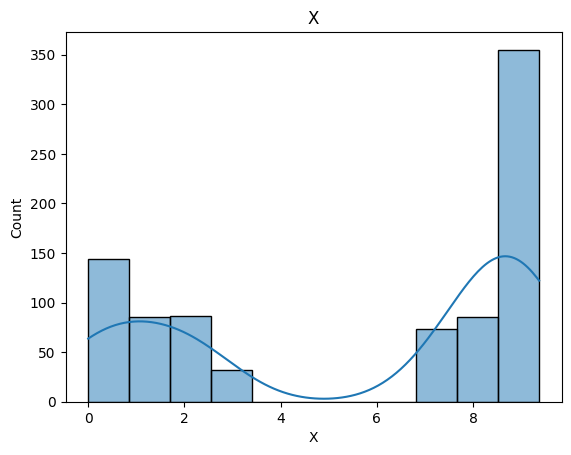

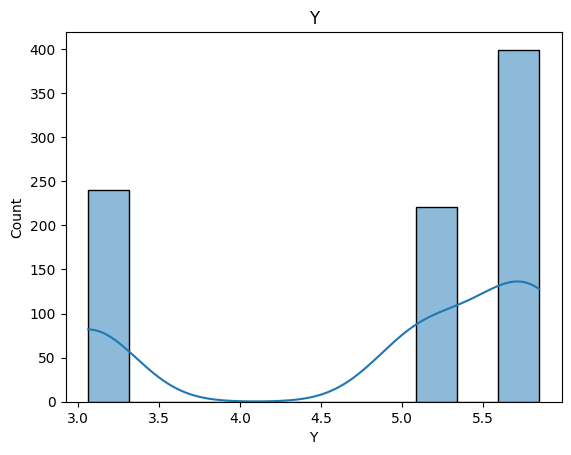

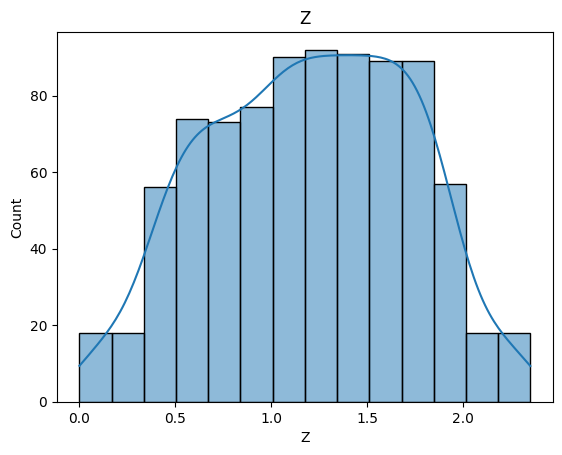

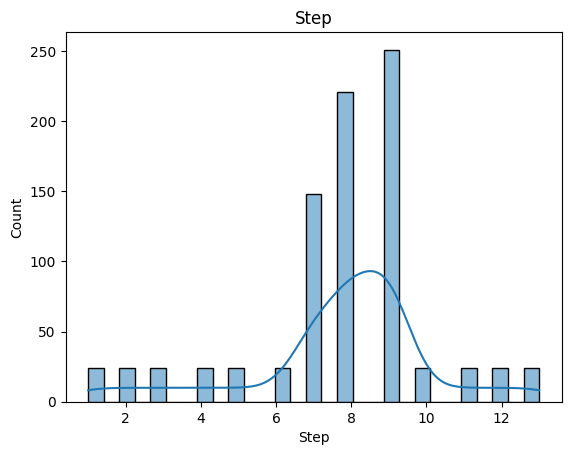

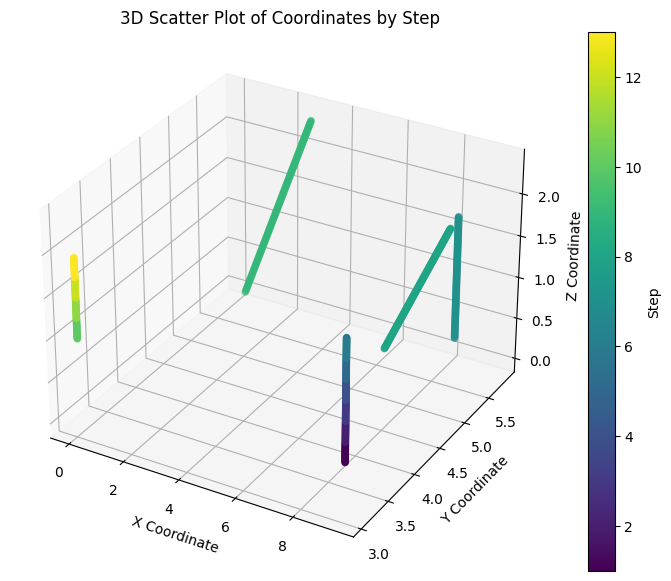

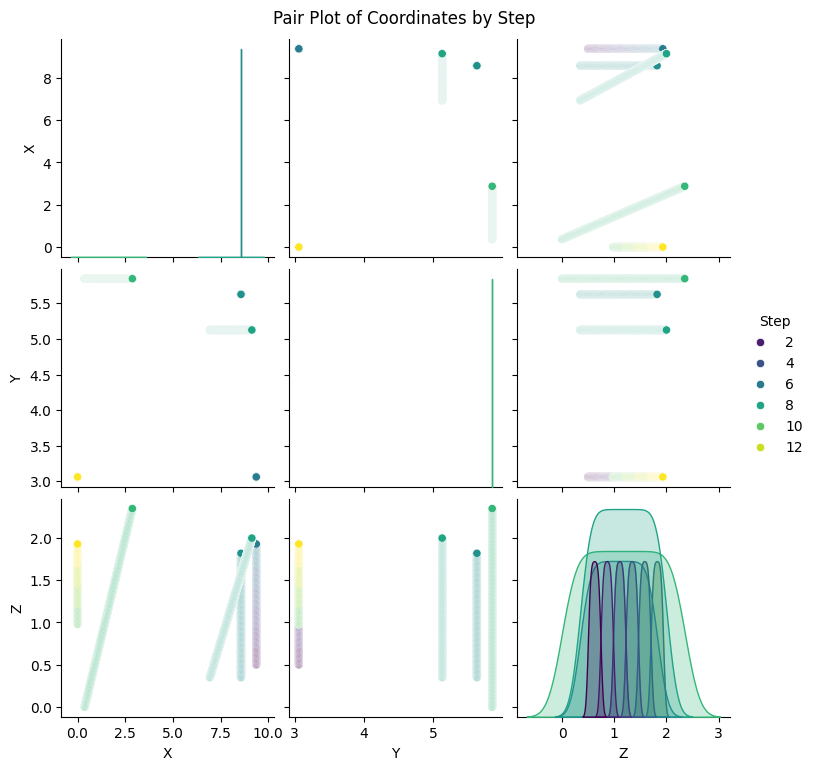

In [ ]:
print(df.describe())
print("Skewness:\n", df.skew()) #shows asymmetry of the data distribution
print("Kurtosis:\n", df.kurtosis()) #to see if the data is heavytailed or light tailed
# to visualize distribution of individual features.
import matplotlib.pyplot as plt
import seaborn as sns


# Histogram with KDE
sns.histplot(df['X'], kde=True)
plt.title("X")
plt.show()
sns.histplot(df['Y'], kde=True)
plt.title("Y")
plt.show()
sns.histplot(df['Z'], kde=True)
plt.title("Z")
plt.show()
sns.histplot(df['Step'], kde=True)
plt.title("Step")
plt.show()

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd

# Assuming 'df' is the DataFrame containing your data
df = pd.read_csv('Project_1_Data.csv')  # Replace with your actual file path

# 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['X'], df['Y'], df['Z'], c=df['Step'], cmap='viridis')

# Add labels and legend
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Z Coordinate')
plt.title('3D Scatter Plot of Coordinates by Step')
plt.colorbar(scatter, ax=ax, label='Step')
plt.show()


# Pair plot of X, Y, Z vs. Step
sns.pairplot(df, vars=['X', 'Y', 'Z'], hue='Step', palette='viridis')
plt.suptitle("Pair Plot of Coordinates by Step", y=1.02)
plt.show()



Step 3: Correlation Analysis

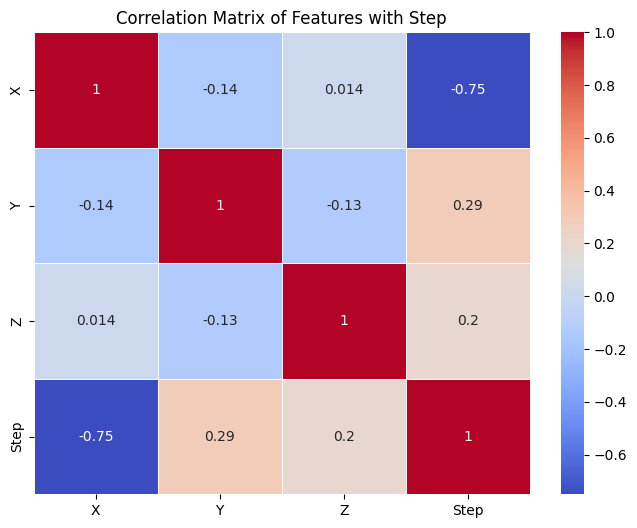

In [ ]:
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Features with Step")
plt.show()

Classification Model Development/Engineering

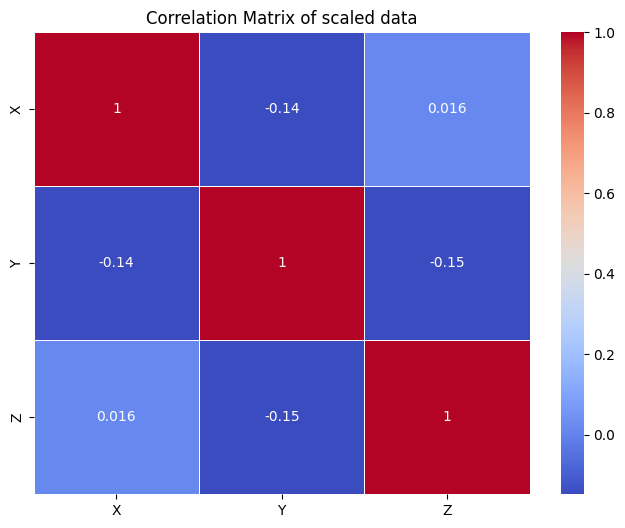

Best Logistic Regression Model: LogisticRegression(C=100, max_iter=2000)
Best SVM Model: SVC(C=1, kernel='linear')
Best Decision Tree Model: DecisionTreeClassifier(random_state=42)
Best Random Forest Model (RandomizedSearchCV): RandomForestClassifier(max_depth=20, n_estimators=50, random_state=42)
Logistic Regression - Accuracy (Test): 0.9941860465116279
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5
           5       0.83      1.00      0.91         5
           6       1.00      0.75      0.86         4
           7       1.00      1.00      1.00        29
           8       1.00      1.00      1.00        44
           9       1.00      1.00      1.00        50
          10       1.00      1.00      1.00         5
   

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
#splitting
df["step_category"] = df["Step"]

my_splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in my_splitter.split(df, df["step_category"]):
    strat_df_train = df.loc[train_index].reset_index(drop=True)
    strat_df_test = df.loc[test_index].reset_index(drop=True)

strat_df_train = strat_df_train.drop(columns=["step_category"], axis=1)
strat_df_test = strat_df_test.drop(columns=["step_category"], axis=1)

X_train = strat_df_train.drop("Step", axis=1)
y_train = strat_df_train["Step"]
X_test = strat_df_test.drop("Step", axis=1)
y_test = strat_df_test["Step"]

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)


corr_matrixx = X_train.corr()
# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrixx, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of scaled data")
plt.show()

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Logistic Regression
logistic_reg = LogisticRegression(max_iter=2000)
param_grid_lr = {
    'penalty': ['l2'],
    'C': [0.1, 1, 10, 100]
}
grid_search_lr = GridSearchCV(logistic_reg, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_lr.fit(X_train_scaled_df, y_train)
best_model_lr = grid_search_lr.best_estimator_
print("Best Logistic Regression Model:", best_model_lr)

# Support Vector Machine (SVM)
svm = SVC()
param_grid_svm = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train_scaled_df, y_train)
best_model_svm = grid_search_svm.best_estimator_
print("Best SVM Model:", best_model_svm)

# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
param_grid_dt = {
    'max_depth': [None, 5, 10, 15],  # Adjusted depths considering typical tree structures
    'min_samples_split': [2, 10, 20],  # Increased options for splits
    'min_samples_leaf': [1, 5, 10]     # Increased to make the model less likely to overfit
}
grid_search_dt = GridSearchCV(decision_tree, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train_scaled_df, y_train)
best_model_dt = grid_search_dt.best_estimator_
print("Best Decision Tree Model:", best_model_dt)

# Random Forest
random_forest = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [30, 50, 100],  # More estimators for better performance
    'max_depth': [None, 10, 20],  # Reduced to make training faster
    'min_samples_split': [2, 10, 20],  # Increased options for splits
    'min_samples_leaf': [1, 5, 10],    # More leaf nodes to avoid overfitting
    'max_features': ['sqrt', 'log2']   # Commonly used values for max_features in classification
}
random_search_rf = RandomizedSearchCV(
    random_forest,
    param_distributions=param_grid_rf,
    n_iter=50,             # Number of parameter settings sampled
    cv=5,                  # Number of cross-validation folds
    scoring='accuracy',    # Scoring metric for evaluation
    random_state=42,
    n_jobs=-1              # Use all available cores
)

random_search_rf.fit(X_train_scaled_df, y_train)
best_model_rf_random = random_search_rf.best_estimator_
print("Best Random Forest Model (RandomizedSearchCV):", best_model_rf_random)


from sklearn.metrics import accuracy_score, classification_report

# Logistic Regression
y_test_pred_lr = best_model_lr.predict(X_test_scaled_df)
accuracy_test_lr = accuracy_score(y_test, y_test_pred_lr)
print(f"Logistic Regression - Accuracy (Test): {accuracy_test_lr}")
print("Classification Report (Logistic Regression):")
print(classification_report(y_test, y_test_pred_lr))

# Support Vector Machine (SVM)
y_test_pred_svm = best_model_svm.predict(X_test_scaled_df)
accuracy_test_svm = accuracy_score(y_test, y_test_pred_svm)
print(f"SVM - Accuracy (Test): {accuracy_test_svm}")
print("Classification Report (SVM):")
print(classification_report(y_test, y_test_pred_svm))

# Decision Tree
y_test_pred_dt = best_model_dt.predict(X_test_scaled_df)
accuracy_test_dt = accuracy_score(y_test, y_test_pred_dt)
print(f"Decision Tree - Accuracy (Test): {accuracy_test_dt}")
print("Classification Report (Decision Tree):")
print(classification_report(y_test, y_test_pred_dt))

# Random Forest with RandomizedSearchCV
y_test_pred_rf_random = best_model_rf_random.predict(X_test_scaled_df)
accuracy_test_rf_random = accuracy_score(y_test, y_test_pred_rf_random)
print(f"Random Forest (RandomizedSearchCV) - Accuracy (Test): {accuracy_test_rf_random}")
print("Classification Report (Random Forest - RandomizedSearchCV):")
print(classification_report(y_test, y_test_pred_rf_random))


STEP 6

In [43]:
# Logistic Regression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score

# Confusion Matrix for Logistic Regression
conf_matrix_lr = confusion_matrix(y_test, y_test_pred_lr)
print("Confusion Matrix (Logistic Regression):")
print(conf_matrix_lr)

# Confusion Matrix for SVM
conf_matrix_svm = confusion_matrix(y_test, y_test_pred_svm)
print("Confusion Matrix (SVM):")
print(conf_matrix_svm)

# Confusion Matrix for Decision Tree
conf_matrix_dt = confusion_matrix(y_test, y_test_pred_dt)
print("Confusion Matrix (Decision Tree):")
print(conf_matrix_dt)

# Confusion Matrix for Random Forest
conf_matrix_rf_random = confusion_matrix(y_test, y_test_pred_rf_random)
print("Confusion Matrix (Random Forest - RandomizedSearchCV):")
print(conf_matrix_rf_random)


Confusion Matrix (Logistic Regression):
[[ 5  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  5  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  5  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  3  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 44  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 50  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  5  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  5  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  5  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  5]]
Confusion Matrix (SVM):
[[ 5  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  5  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  5  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  4  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 44  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 50  0  0  0  0]
 [ 0  0  0 